# QCTO - Workplace Module

### Project Title: Please Insert your Project Title Here
#### Done By: Name and Surname

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [ ]:
# Importing the required packages
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Statistics
import scipy.stats as stats

# Interactive widgets
import ipywidgets as widgets
from IPython.display import display, clear_output

# Machine Learning
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    learning_curve,
    GridSearchCV
)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [3]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [4]:
# Loading data frame and assigning it to Avocado_price_df
avocado_price_df = pd.read_csv("Avocado_HassAvocadoBoard_20152023v1.0.1.csv")

# Displaying the first 5 rows of the data frame
avocado_price_df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [5]:
# Replace NaN values with 0 in the specified columns
# This is because NaN values can cause issues in certain calculations and analyses
# Replace NaN values in the 'SmallBags' column with 0
avocado_price_df['SmallBags'] = avocado_price_df['SmallBags'].fillna(value=0)
# Replace NaN values in the 'LargeBags' column with 0
avocado_price_df['LargeBags'] = avocado_price_df['LargeBags'].fillna(value=0)
# Replace NaN values in the 'XLargeBags' column with 0
avocado_price_df['XLargeBags'] = avocado_price_df['XLargeBags'].fillna(value=0)

# Verify the changes by checking the count of NaN values in each column
# The isnull().sum() function returns a count of NaN values in each column
# If the count is 0, it means all NaN values have been replaced
avocado_price_df.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
region          0
dtype: int64

In [6]:
# Convert the 'date' column from object type to datetime type
# This is necessary because the 'date' column is currently being treated as a string
# Converting it to datetime will allow us to perform date-based operations and analysis
avocado_price_df['Date'] = pd.to_datetime(avocado_price_df['Date'])

# Extract year and month from the 'date' column for better analysis
# Create a new 'year' column that contains the year component of the 'date' column
# Create a new 'month' column that contains the month component of the 'date' column
avocado_price_df['year'] = avocado_price_df['Date'].dt.year
avocado_price_df['month'] = avocado_price_df['Date'].dt.month

# Display the first few rows of the dataframe to verify the new columns
# The head() function returns the first few rows of the dataframe
avocado_price_df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,year,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,2015,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,2015,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,2015,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta,2015,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington,2015,1


In [7]:
unique_regions = avocado_price_df['region'].unique()
# Convert to a list to inspect or manipulate further
unique_regions_list = unique_regions.tolist()
# Print or inspect the list
print(unique_regions_list)

num_unique_regions = len(avocado_price_df['region'].unique())
print("Number of unique regions:", num_unique_regions)

['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'Miami', 'Midsouth', 'Nashville', 'NewOrleans', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico', 'BirminghamMontgomery', 'PeoriaSpringfield', 'Providence', 'Toledo', 'Wichita', 'MiamiFtLauderdale']
Number of unique regions: 60


In [8]:
us_divisions ={
'Albany': 'Middle Atlantic',
'Atlanta': 'South Atlantic',
'BaltimoreWashington':'South Atlantic',
'Boise':'West',
'Boston':'New England',
'BuffaloRochester': 'Middle Atlantic',
'California': 'Pacific',
'Charlotte': 'South Atlantic',
'Chicago': 'East North Central',
'CincinnatiDayton': 'East North Central',
'Columbus': 'East North Central',
'DallasFtWorth': 'West South Central',
'Denver': 'Mountain',
'Detroit':'East North Central',
'GrandRapids': 'East North Central',
'GreatLakes': 'East North Central',
'HarrisburgScranton': 'Middle Atlantic',
'HartfordSpringfield': 'New England',
'Houston': 'West South Central',
'Indianapolis': 'East North Central',
'Jacksonville': 'South Atlantic',
'LasVegas': 'Mountain',
'LosAngeles': 'Pacific',
'Louisville': 'East South Central',
'Miami': 'South Atlantic',
'Midsouth': 'Midsouth',
'Nashville': 'East South Central',
'NewOrleans': 'West South Central',
'NewYork': 'Middle Atlantic',
'Northeast': 'Northeast',
'NorthernNewEngland': 'New England',
'Orlando': 'South Atlantic',
'Philadelphia': 'Middle Atlantic',
'PhoenixTucson': 'Mountain',
'Pittsburgh': 'Middle Atlantic',
'Plains': 'Plains',
'Portland': 'New England',
'RaleighGreensboro': 'South Atlantic',
'RichmondNorfolk': 'South Atlantic',
'Roanoke': 'South Atlantic',
'Sacramento': 'California',
'SanDiego': 'California',
'SanFrancisco': 'California',
'Seattle': 'Pacific',
'SouthCarolina': 'South Atlantic',
'SouthCentral': 'SouthCentral',
'Southeast': 'Southeast',
'Spokane': 'Pacific',
'StLouis': 'Midwest',
'Syracuse': 'Mountain',
'Tampa': 'South Atlantic',
'TotalUS': 'TotalUS',
'West': 'West',
'WestTexNewMexico': 'Mountain',
'BirminghamMontgomery': 'East South Central',
'PeoriaSpringfield': 'East North Central',
'Providence': 'New England',
'Toledo': 'East North Central',
'Wichita': 'West North Central',
'MiamiFtLauderdale': 'South Atlantic'
}

avocado_price_df['divisions'] = avocado_price_df['region'].map(us_divisions)
print('List of Values within Divisions Column:',avocado_price_df['divisions'].unique())
print('\nNumber of unique values in the divisions Column',len(avocado_price_df['divisions'].unique()))


List of Values within Divisions Column: ['Middle Atlantic' 'South Atlantic' 'West' 'New England' 'Pacific'
 'East North Central' 'West South Central' 'Mountain' 'East South Central'
 'Midsouth' 'Northeast' 'Plains' 'California' 'SouthCentral' 'Southeast'
 'Midwest' 'TotalUS' 'West North Central']

Number of unique values in the divisions Column 18


In [9]:
# Removing data that is groups of other data points to avoid duplication
avocado_price_df = avocado_price_df[~avocado_price_df['region'].isin(["TotalUS", "Northeast", "SouthCentral", "Southeast", "West", "Midsouth", "California", "SouthCarolina", "GreatLakes", "Plains"])]

# Get unique values of the region column to verify
avocado_price_df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'Charlotte', 'Chicago', 'CincinnatiDayton',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'HarrisburgScranton', 'HartfordSpringfield', 'Houston',
       'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles',
       'Louisville', 'Miami', 'Nashville', 'NewOrleans', 'NewYork',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk',
       'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle',
       'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'WestTexNewMexico',
       'BirminghamMontgomery', 'PeoriaSpringfield', 'Providence',
       'Toledo', 'Wichita', 'MiamiFtLauderdale'], dtype=object)

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


### 1. General overview

In [10]:
# Summary statistics for numerical columns
print(avocado_price_df.describe())

# Date range
print(f"Date range: {avocado_price_df['Date'].min()} to {avocado_price_df['Date'].max()}")

                                Date  AveragePrice   TotalVolume  \
count                          44095  44095.000000  4.409500e+04   
mean   2019-07-28 01:58:38.521374464      1.437019  2.611949e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2017-05-28 00:00:00      1.120000  1.270516e+04   
50%              2019-08-18 00:00:00      1.402818  7.867566e+04   
75%              2021-10-10 00:00:00      1.701868  3.380673e+05   
max              2023-12-03 00:00:00      3.440830  5.470227e+06   
std                              NaN      0.403395  4.350474e+05   

            plu4046       plu4225       plu4770     TotalBags     SmallBags  \
count  4.409500e+04  4.409500e+04  4.409500e+04  4.409500e+04  4.409500e+04   
mean   8.432102e+04  6.884591e+04  6.447937e+03  6.630512e+04  2.435953e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.166800e+02  1.363345e+03  0.000000e+00  5.789265e+03  0.000000

### 2. Time-series analysis

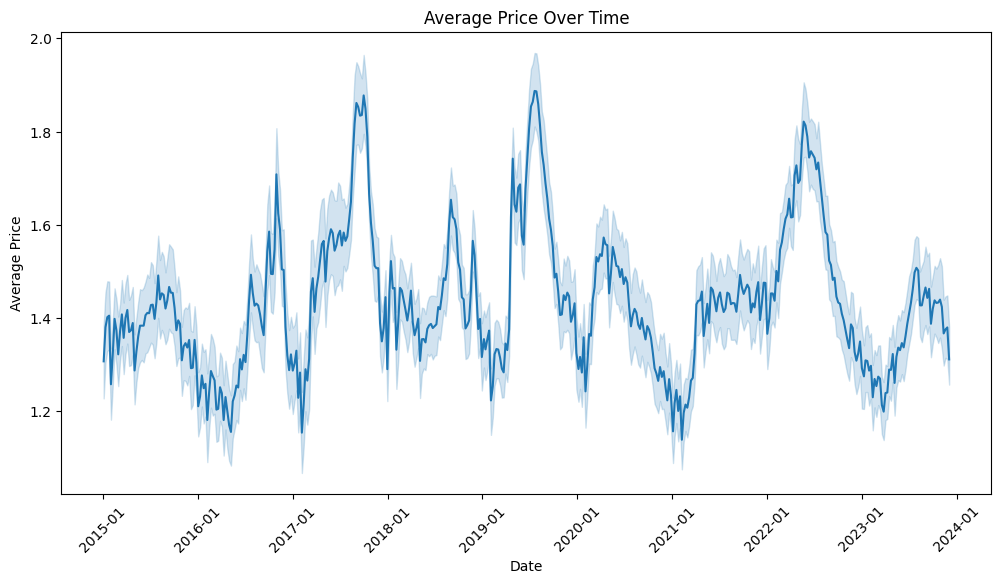

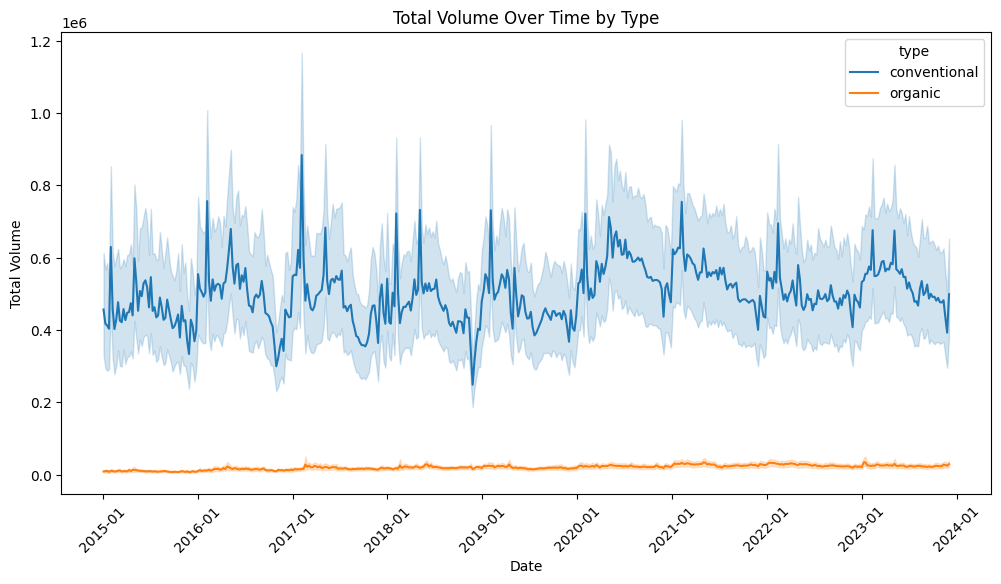

In [ ]:
# Ensure Date is a datetime object and sort the data
avocado_price_df['Date'] = pd.to_datetime(avocado_price_df['Date'])
avocado_price_df = avocado_price_df.sort_values('Date')

# Improved Price Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=avocado_price_df, x='Date', y='AveragePrice')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Set only the dates present in the dataset as ticks
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=10))  # Auto-adjust number of ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
plt.show()

# Improved Volume Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=avocado_price_df, x='Date', y='TotalVolume', hue='type')
plt.title('Total Volume Over Time by Type')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)

# Same approach for consistent x-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

### 3. Region Analysis

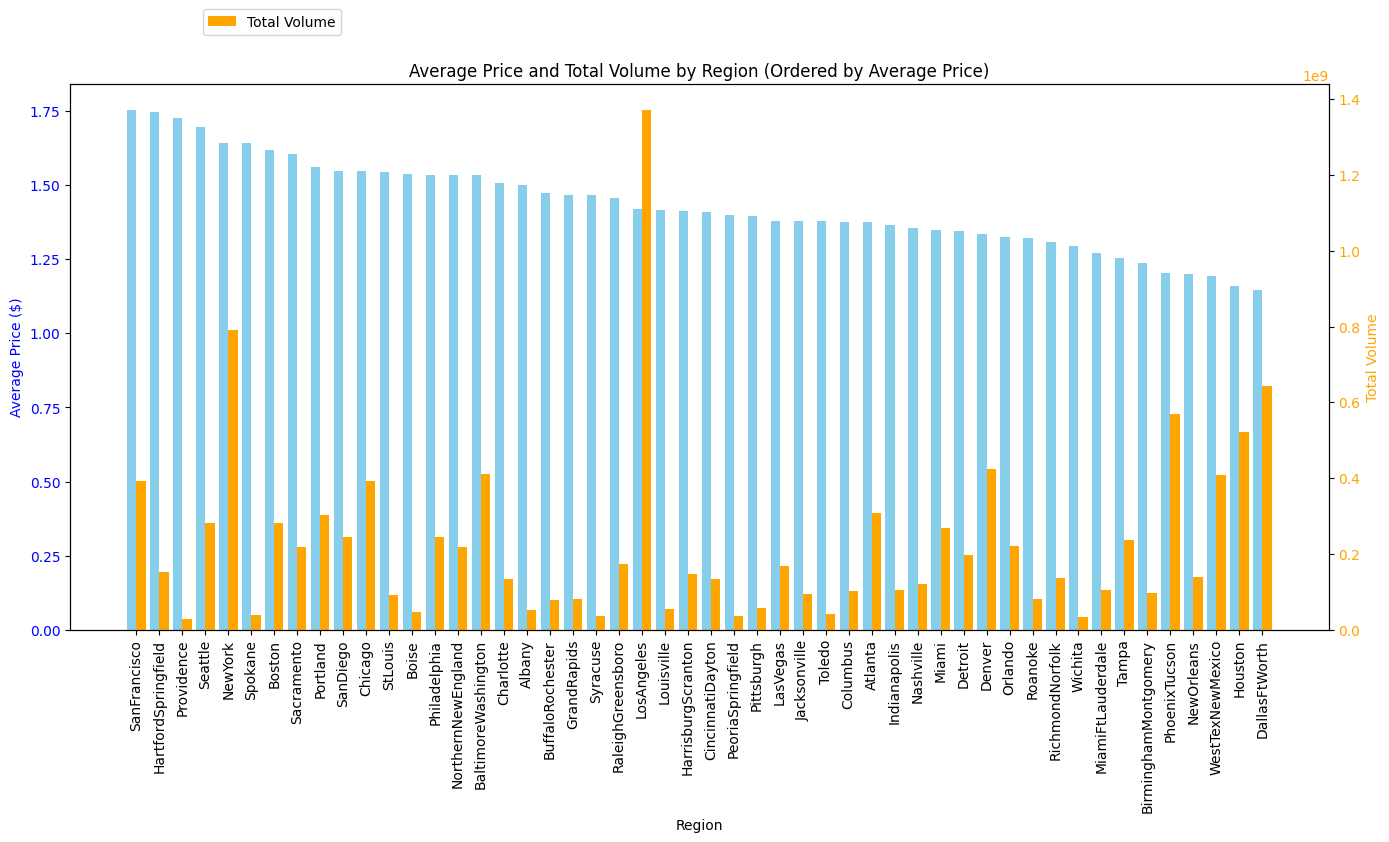

In [ ]:
# Aggregate data by region
avg_price_region = avocado_price_df.groupby('region')['AveragePrice'].mean()
total_volume_region = avocado_price_df.groupby('region')['TotalVolume'].sum()

# Sort regions by average price
avg_price_region = avg_price_region.sort_values(ascending=False)
total_volume_region = total_volume_region[avg_price_region.index]  # Align total volume with the sorted order

# Create the bar chart with sorted regions
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar width and positions
bar_width = 0.4
x = np.arange(len(avg_price_region))  # Numeric positions for the bars

# Bar chart for average price
ax1.bar(x - bar_width/2, avg_price_region, bar_width, label='Average Price ($)', color='skyblue')
ax1.set_ylabel('Average Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Region')
ax1.set_xticks(x)
ax1.set_xticklabels(avg_price_region.index, rotation=90)

# Second y-axis for total volume
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, total_volume_region, bar_width, label='Total Volume', color='orange')
ax2.set_ylabel('Total Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legend
plt.title('Average Price and Total Volume by Region (Ordered by Average Price)')
fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=2)
plt.show()

### 4. Type-based Analysis

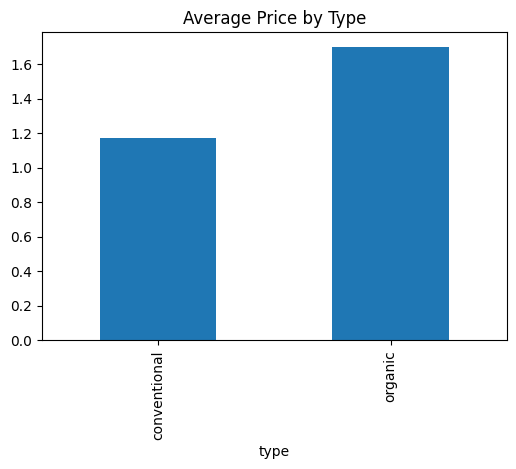

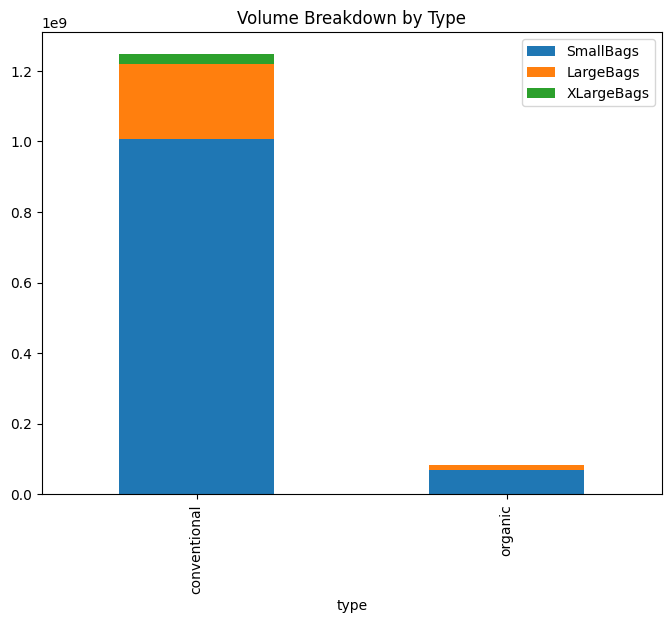

In [13]:
# Comparison by type
avg_price_type = avocado_price_df.groupby('type')['AveragePrice'].mean()
avg_price_type.plot(kind='bar', title='Average Price by Type', figsize=(6, 4))
plt.show()

# Volume breakdown
volume_by_type = avocado_price_df.groupby('type')[['SmallBags', 'LargeBags', 'XLargeBags']].sum()
volume_by_type.plot(kind='bar', stacked=True, figsize=(8, 6), title='Volume Breakdown by Type')
plt.show()

### 5. Relationships and Correlations

In [14]:
# Price and volume correlation
correlation = avocado_price_df[['AveragePrice', 'TotalVolume']].corr()
print(correlation)

# PLU volume contributions
plu_volume = avocado_price_df[['plu4046', 'plu4225', 'plu4770', 'TotalVolume']].sum()
plu_volume_percentage = plu_volume / plu_volume['TotalVolume'] * 100
print(plu_volume_percentage)

              AveragePrice  TotalVolume
AveragePrice      1.000000    -0.419557
TotalVolume      -0.419557     1.000000
plu4046         32.282799
plu4225         26.358062
plu4770          2.468631
TotalVolume    100.000000
dtype: float64


### 6. Distribution analysis

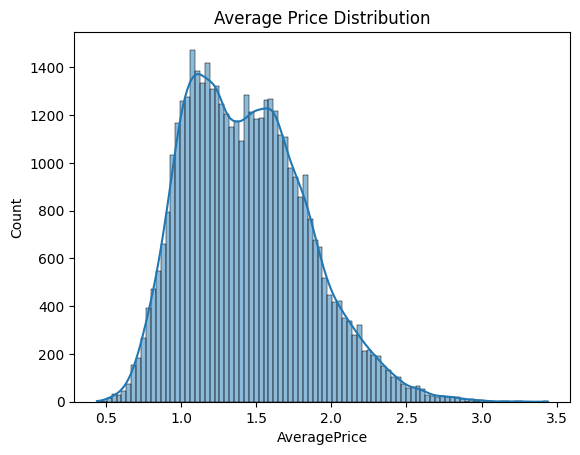

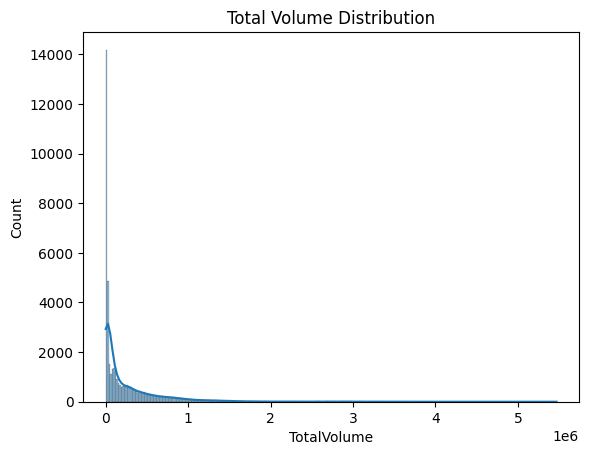

In [15]:
# Price distribution
sns.histplot(avocado_price_df['AveragePrice'], kde=True)
plt.title('Average Price Distribution')
plt.show()

# Volume distribution
sns.histplot(avocado_price_df['TotalVolume'], kde=True)
plt.title('Total Volume Distribution')
plt.show()

### 7. Anomalies and outliers

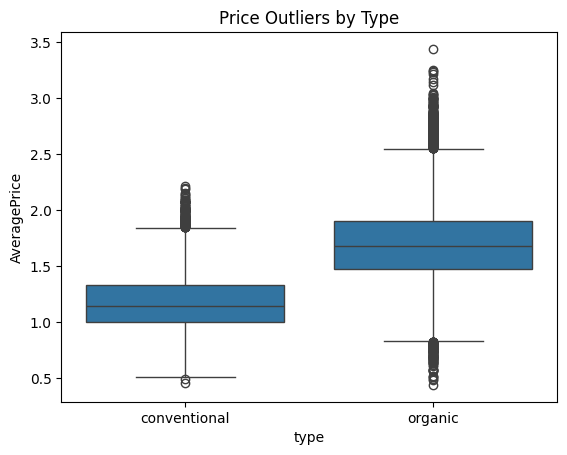

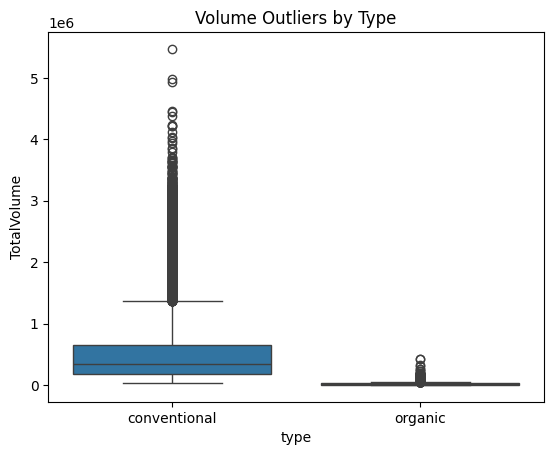

In [16]:
# Price outliers
sns.boxplot(data=avocado_price_df, x='type', y='AveragePrice')
plt.title('Price Outliers by Type')
plt.show()

# Volume outliers
sns.boxplot(data=avocado_price_df, x='type', y='TotalVolume')
plt.title('Volume Outliers by Type')
plt.show()

### 8. Regional and temporal intersections

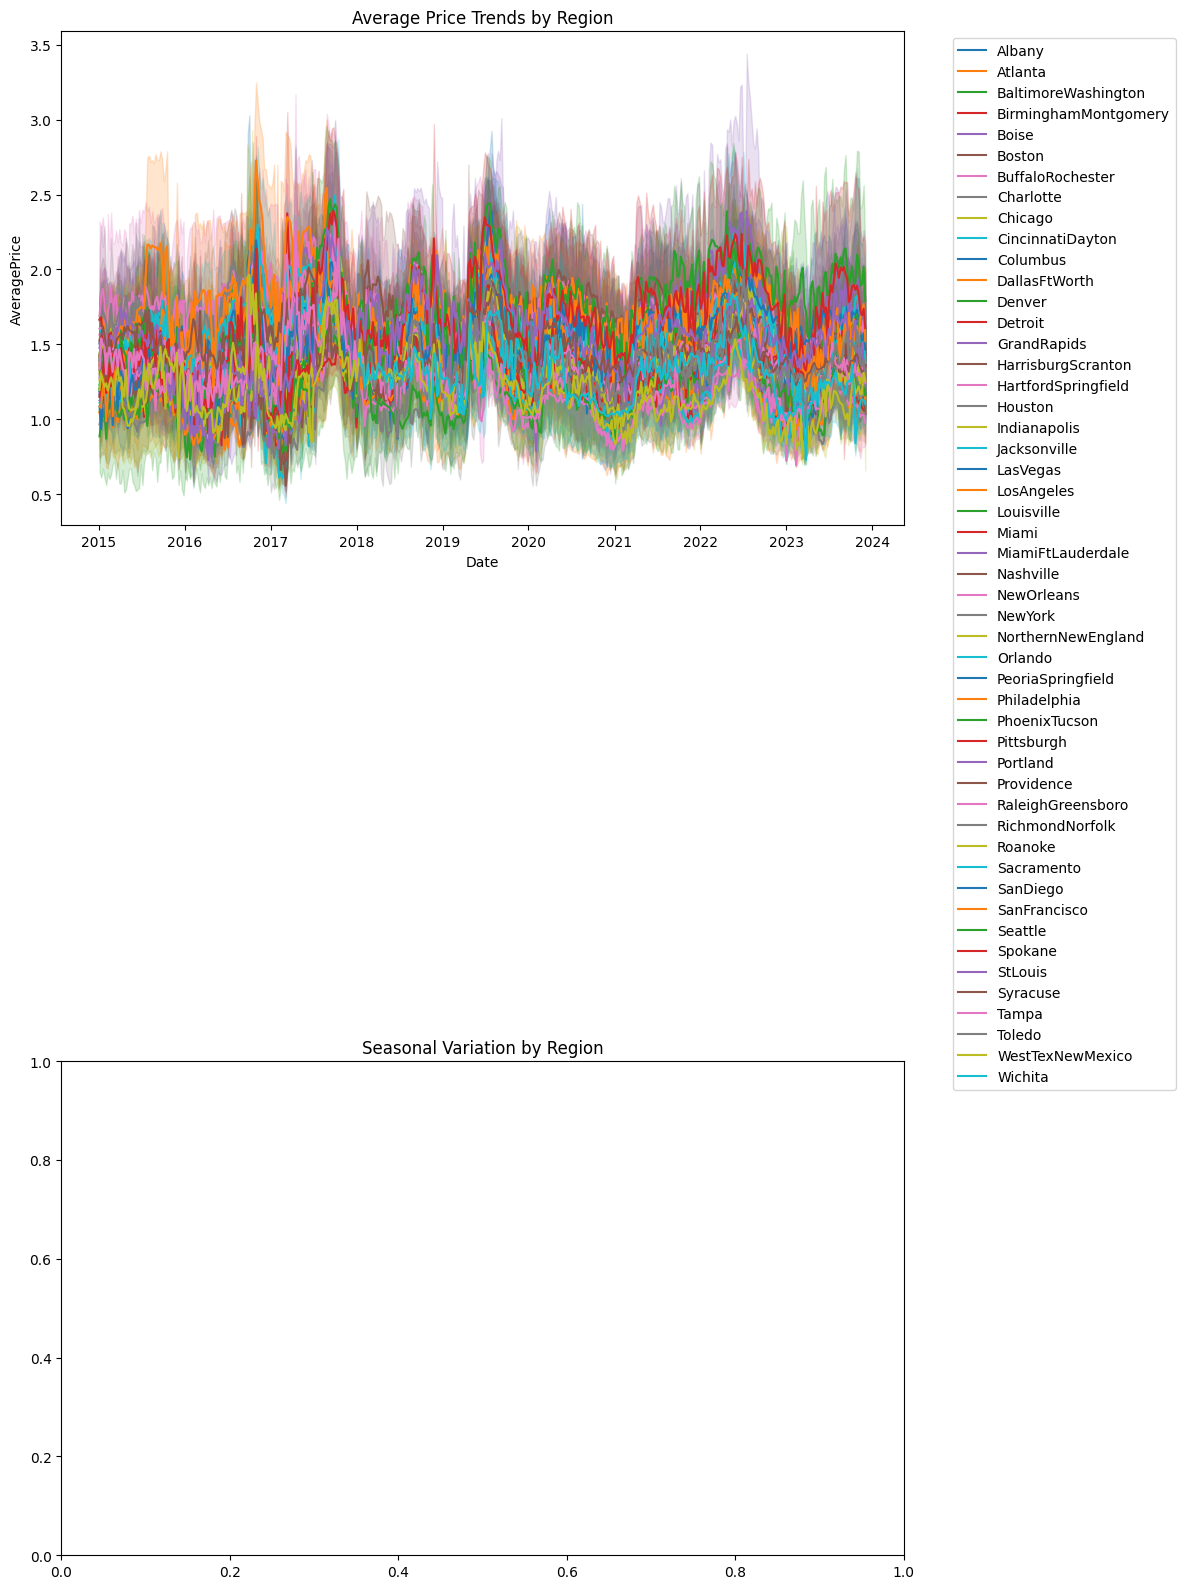

In [ ]:
# Create checkboxes for each region
def create_region_selector(avocado_price_df):
    regions = sorted(avocado_price_df['region'].unique())
    region_checkboxes = {region: widgets.Checkbox(
        value=True,
        description=region,
        disabled=False
    ) for region in regions}
    
    # Create a container for all checkboxes
    checkbox_container = widgets.VBox([widgets.HTML("<b>Select Regions:</b>")] + 
                                    list(region_checkboxes.values()))
    
    # Function to update the plots
    def update_plots(change):
        clear_output(wait=True)
        
        # Get selected regions
        selected_regions = [region for region, checkbox in region_checkboxes.items() 
                          if checkbox.value]
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
        
        # Price trends plot
        for region in selected_regions:
            region_data = avocado_price_df[avocado_price_df['region'] == region]
            sns.lineplot(data=region_data, x='Date', y='AveragePrice', 
                        label=region, ax=ax1)
        ax1.set_title('Average Price Trends by Region')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Seasonal variation heatmap
        seasonal_data = (avocado_price_df[avocado_price_df['region'].isin(selected_regions)]
                        .groupby(['region', 'month'])['AveragePrice']
                        .mean()
                        .unstack())

        ax2.set_title('Seasonal Variation by Region')
        
        plt.tight_layout()
        plt.show()
        
        # Display the checkbox container again
        display(checkbox_container)
    
    # Add observers to all checkboxes
    for checkbox in region_checkboxes.values():
        checkbox.observe(update_plots, names='value')
    
    # Initial display
    display(checkbox_container)
    update_plots(None)

# Call the function with your dataframe
create_region_selector(avocado_price_df)


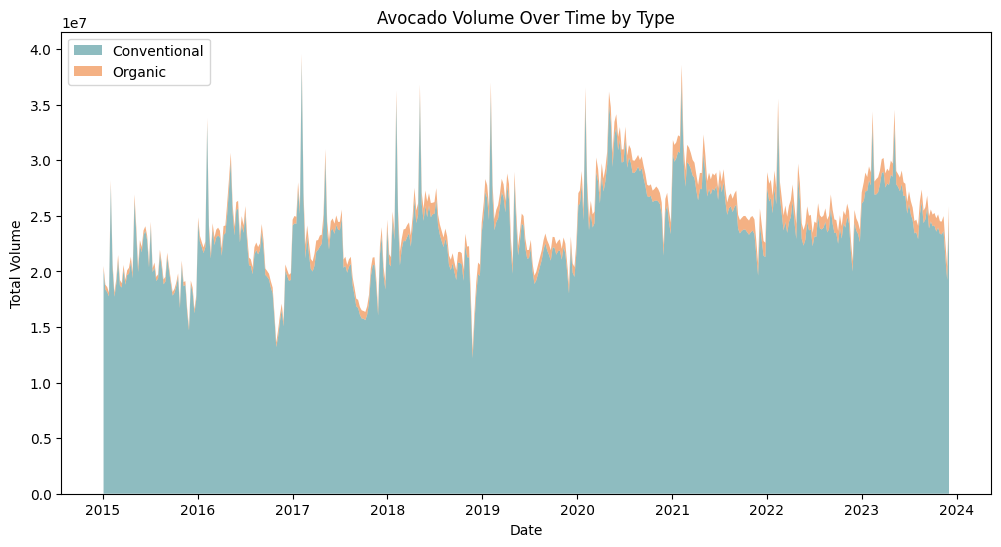

In [18]:
# Group the data by date and type, and sum the total volume for each group
# This will give us a DataFrame with the total volume for each type of avocado on each date
volume_by_type = avocado_price_df.groupby(['Date', 'type'])['TotalVolume'].sum().unstack()

# Create a new figure with a specified size
plt.figure(figsize=(12, 6))

# Define custom colors
custom_palette = {'conventional': '#439096', 'organic': '#ed7d32'}

# Create a stacked area chart, where each area represents the total volume of a specific type of avocado
# The x-axis represents the dates, and the y-axis represents the total volume
plt.stackplot(volume_by_type.index, volume_by_type['conventional'], volume_by_type['organic'],
              labels=['Conventional', 'Organic'], alpha=0.6,colors=[custom_palette['conventional'], custom_palette['organic']])

# Add labels to the x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('Total Volume')

# Add a title to the chart
plt.title('Avocado Volume Over Time by Type')

# Add a legend to the chart, located in the upper left corner
plt.legend(loc='upper left')

# Display the chart
plt.show()

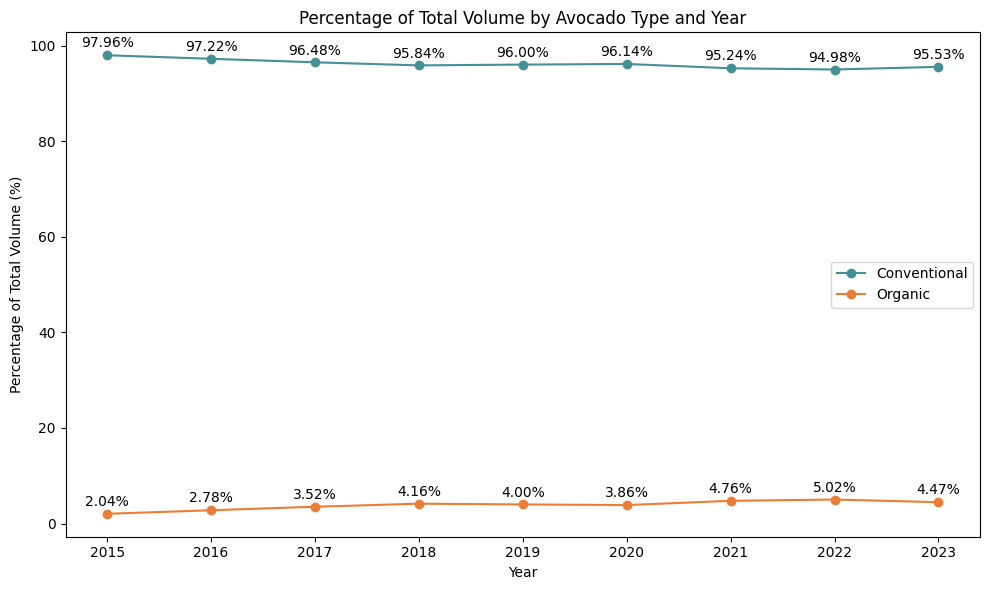

In [19]:
# Group by 'type' and 'year', calculate sum of 'total_volume' for each group
avocado_types_yearly = avocado_price_df.groupby(['type', 'year']).agg(
    avg_type_price=('AveragePrice', 'mean'),
    total_volume=('TotalVolume', 'sum')
).reset_index()

# Calculate percentage of total volume per year for each type
avocado_types_yearly['percentage'] = avocado_types_yearly.groupby('year')['total_volume'].transform(lambda x: (x / x.sum()) * 100)

# Plotting as line chart
plt.figure(figsize=(10, 6))

# Separate line plots for each type
plt.plot(avocado_types_yearly[avocado_types_yearly['type'] == 'conventional']['year'],
         avocado_types_yearly.loc[avocado_types_yearly['type'] == 'conventional', 'percentage'],
         marker='o', linestyle='-', label='Conventional', color='#439096')

plt.plot(avocado_types_yearly[avocado_types_yearly['type'] == 'organic']['year'],
         avocado_types_yearly.loc[avocado_types_yearly['type'] == 'organic', 'percentage'],
         marker='o', linestyle='-', label='Organic', color='#ed7d32')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Total Volume (%)')
plt.title('Percentage of Total Volume by Avocado Type and Year')
plt.xticks(avocado_types_yearly['year'].unique())
plt.legend()

# Add annotations
for i, row in avocado_types_yearly.iterrows():
    plt.text(row['year'], row['percentage'] + 1, f'{row["percentage"]:.2f}%', ha='center', va='bottom')

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()


In [20]:
# Set Date column as index
avocado_price_df.set_index('Date', inplace=True)

/var/folders/_q/6cj0l6yx6_32stkj1yv5551r0000gn/T/ipykernel_78983/1519884042.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(avocado_price_df, x='AveragePrice', y='type', inner='box', palette=custom_palette)


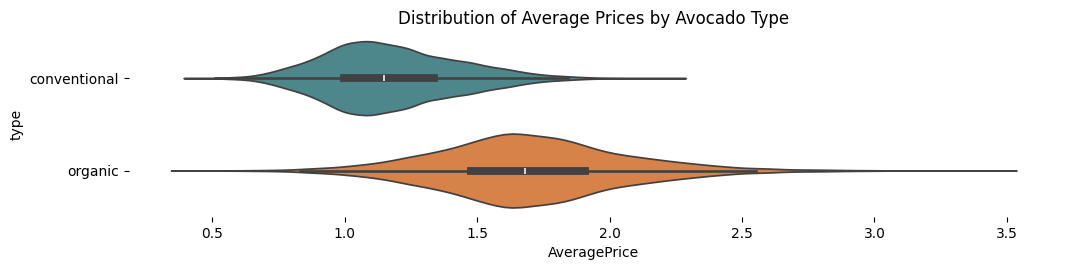

In [21]:
# Set the figure size based on the number of unique types
figsize = (12, 1.2 * len(avocado_price_df['type'].unique()))
plt.figure(figsize=figsize)

custom_palette = {
    'conventional': '#439096',  # Custom color for conventional
    'organic': '#ed7d32'        # Custom color for organic
}

# Create a violin plot to visualize the distribution of average prices by type
sns.violinplot(avocado_price_df, x='AveragePrice', y='type', inner='box', palette=custom_palette)

# Remove the top, right, and bottom spines to make the plot cleaner
sns.despine(top=True, right=True, bottom=True, left=True)


# Add a title to the plot to describe what it shows
plt.title('Distribution of Average Prices by Avocado Type')

# Display the plot
plt.show()

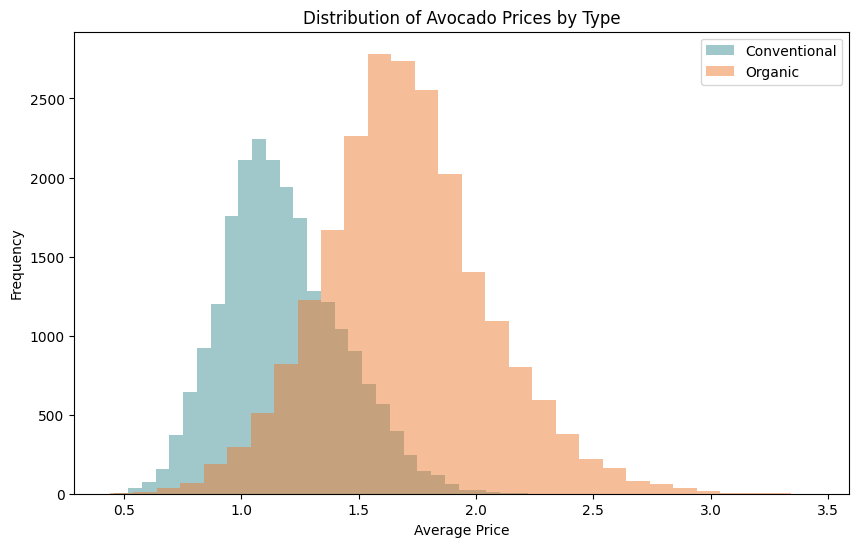

In [22]:
# Create a histogram to visualize the distribution of avocado prices by type
plt.figure(figsize=(10, 6))

# Filter the dataframe to get conventional avocado prices and plot a histogram
conventional_prices = avocado_price_df[avocado_price_df['type'] == 'conventional']['AveragePrice']
plt.hist(conventional_prices, bins=30, alpha=0.5, label='Conventional', color='#439096')

# Filter the dataframe to get organic avocado prices and plot a histogram
organic_prices = avocado_price_df[avocado_price_df['type'] == 'organic']['AveragePrice']
plt.hist(organic_prices, bins=30, alpha=0.5, label='Organic', color='#ed7d32')

# Add labels and title to the plot
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Distribution of Avocado Prices by Type')

# Add a legend to distinguish between conventional and organic avocados
plt.legend()

# Display the plot
plt.show()


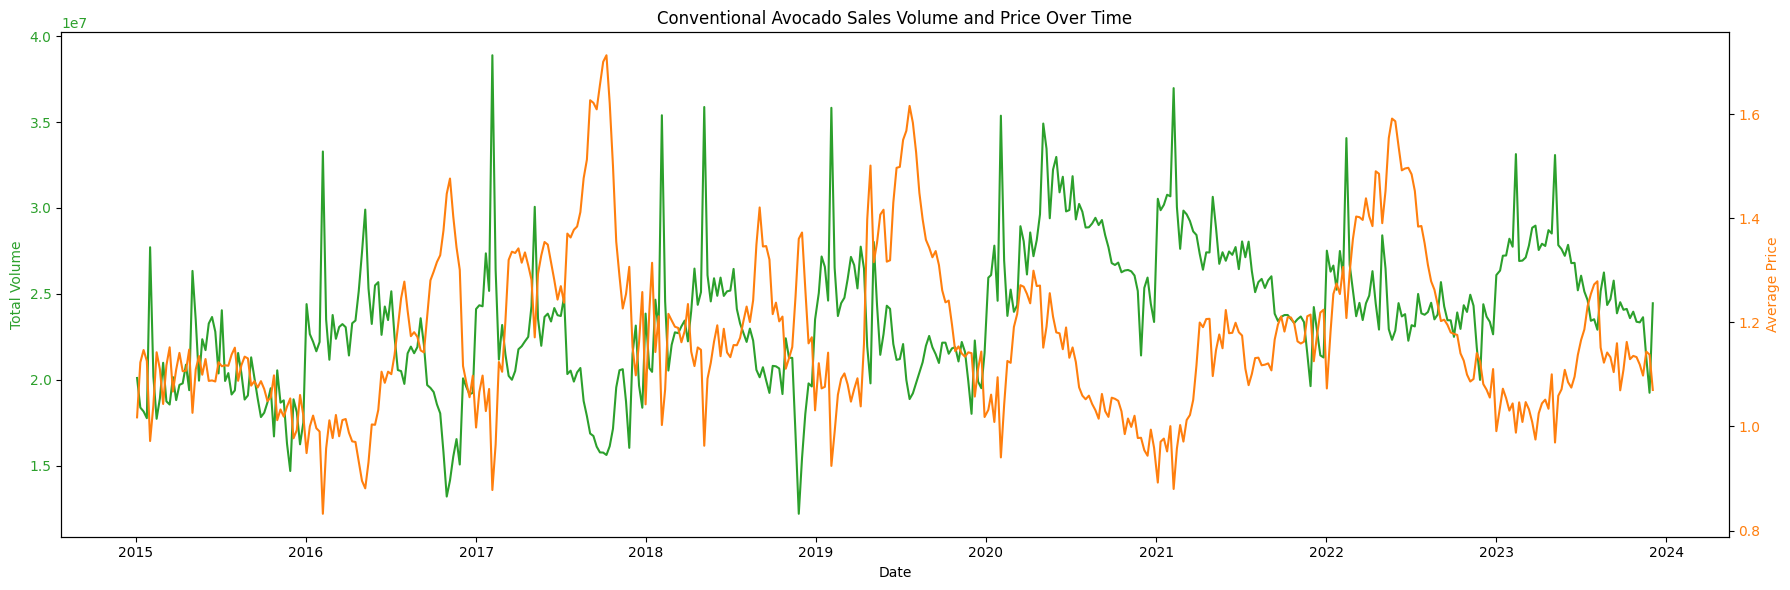

In [23]:
# Filter for conventional avocados
conventional_df = avocado_price_df[avocado_price_df['type'] == 'conventional']

# Group by date and sum the total volume and average price
conventional_sales_by_date = conventional_df.groupby('Date').agg({'TotalVolume': 'sum', 'AveragePrice': 'mean'})

# Create the plot
fig, ax1 = plt.subplots(figsize=(18,6))

# Plot the total volume
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Volume', color=color)
ax1.plot(conventional_sales_by_date.index, conventional_sales_by_date['TotalVolume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the average price
ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Average Price', color=color)
ax2.plot(conventional_sales_by_date.index, conventional_sales_by_date['AveragePrice'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the title and display the plot
plt.title('Conventional Avocado Sales Volume and Price Over Time')
fig.tight_layout()
plt.show()


ValueError: Could not interpret value `date` for `x`. An entry with this name does not appear in `data`.

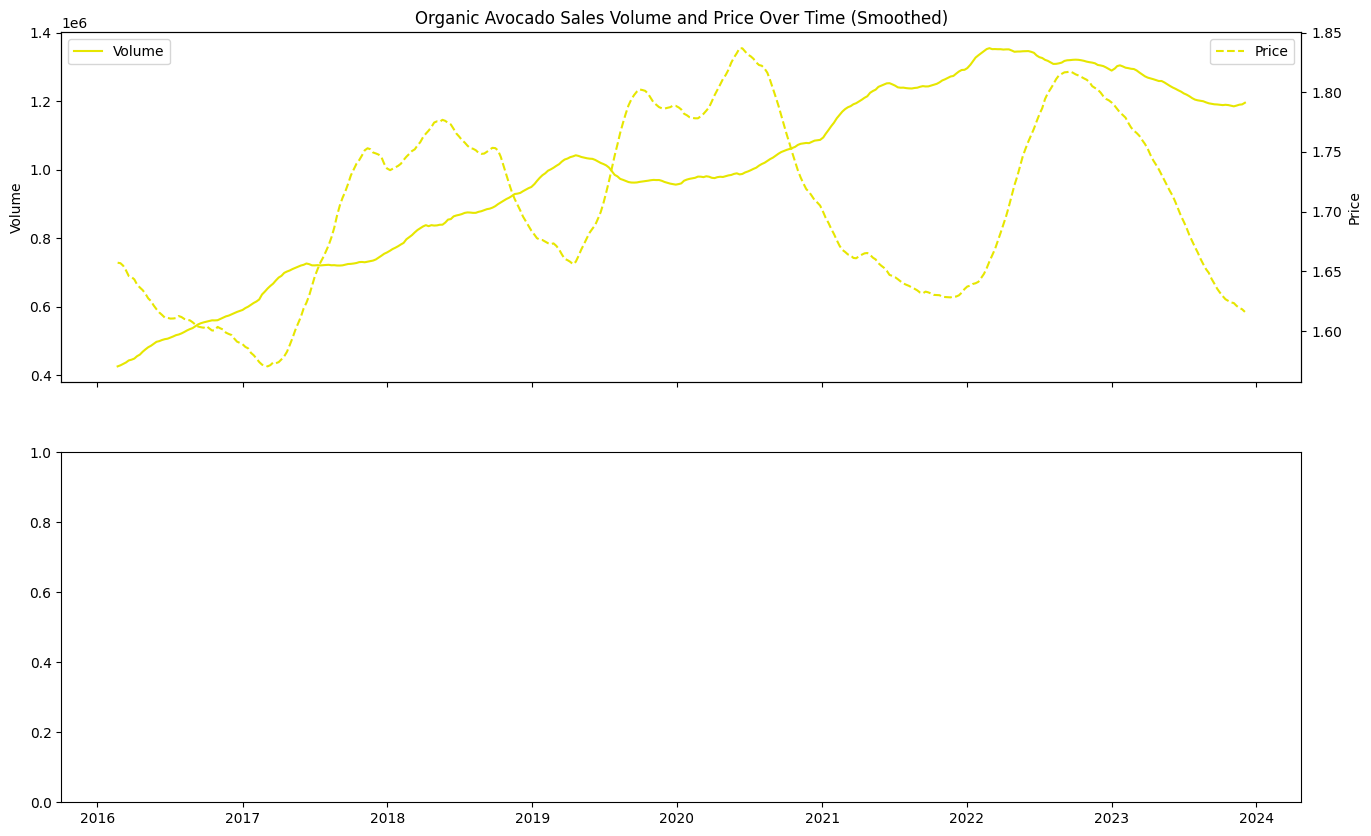

In [27]:
# Group by date and type, calculate mean price and sum volume
avocado_daily = avocado_price_df.groupby(['Date', 'type']).agg(
    mean_price=('AveragePrice', 'mean'),
    total_volume=('TotalVolume', 'sum')
).reset_index()

# Smooth the time series using a rolling average
window_size = 60  # Adjust this value to control the level of smoothing
avocado_daily['smoothed_volume'] = avocado_daily.groupby('type')['total_volume'].rolling(window_size).mean().reset_index(level=0, drop=True)
avocado_daily['smoothed_price'] = avocado_daily.groupby('type')['mean_price'].rolling(window_size).mean().reset_index(level=0, drop=True)

# Create subplots for organic and conventional
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10), sharex=True)

# Plot organic avocados
sns.lineplot(data=avocado_daily[avocado_daily['type'] == 'organic'], x='Date', y='smoothed_volume', color='#e6e600', ax=axes[0], label='Volume')
ax_twin = axes[0].twinx()
sns.lineplot(data=avocado_daily[avocado_daily['type'] == 'organic'], x='Date', y='smoothed_price', color='#e6e600', ax=ax_twin, linestyle='--', label='Price')
axes[0].set_title('Organic Avocado Sales Volume and Price Over Time (Smoothed)')
axes[0].set_ylabel('Volume')
ax_twin.set_ylabel('Price')
axes[0].legend(loc='upper left')
ax_twin.legend(loc='upper right')

# Plot conventional avocados
sns.lineplot(data=avocado_daily[avocado_daily['type'] == 'conventional'], x='date', y='smoothed_volume', color='#85e085', ax=axes[1], label='Volume')
ax_twin = axes[1].twinx()
sns.lineplot(data=avocado_daily[avocado_daily['type'] == 'conventional'], x='date', y='smoothed_price', color='#85e085', ax=ax_twin, linestyle='--', label='Price')
axes[1].set_title('Conventional Avocado Sales Volume and Price Over Time (Smoothed)')
axes[1].set_ylabel('Volume')
ax_twin.set_ylabel('Price')
axes[1].legend(loc='upper left')
ax_twin.legend(loc='upper right')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


#### Feature Selection and Engineering

In [28]:
# First, let's check what columns are actually in your DataFrame
print("Available columns:", avocado_price_df.columns)

# Then, drop the unused columns - using the correct column names
features = avocado_price_df.drop(columns=['TotalVolume', 'AveragePrice'])
target = avocado_price_df['TotalVolume']


Available columns: Index(['AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region',
       'year', 'month', 'divisions'],
      dtype='object')


In [29]:
# Convert categorical variables to numeric using one-hot encoding
features = pd.get_dummies(features)


#### Train/Test Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#### Model Selection and Training

##### (a) Linear Regression

In [ ]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

##### (b) Random Forest

In [ ]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### (c) Gradient Boosting

In [ ]:
# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
 #Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    return mae_train, rmse_train, mae_test, rmse_test

# Evaluate each model
linear_eval = evaluate_model(linear_model, X_train, X_test, y_train, y_test)
rf_eval = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
gb_eval = evaluate_model(gb_model, X_train, X_test, y_train, y_test)

print("Linear Regression Evaluation:", linear_eval)
print("Random Forest Evaluation:", rf_eval)
print("Gradient Boosting Evaluation:", gb_eval)

Linear Regression Evaluation: (np.float64(45434.178809111225), np.float64(89511.36605877202), np.float64(45763.08830671298), np.float64(90985.84567222896))
Random Forest Evaluation: (np.float64(4427.96456738009), np.float64(13519.533739511531), np.float64(12346.633510466037), np.float64(37131.28430955949))
Gradient Boosting Evaluation: (np.float64(27627.909941072787), np.float64(52111.467549087465), np.float64(29454.244411519034), np.float64(58357.73900605039))



--------------------------------------------------
Linear Regression Performance Metrics:
--------------------------------------------------
RMSE:      90985.8457
R-squared: 0.9547
MAE:       45763.0883


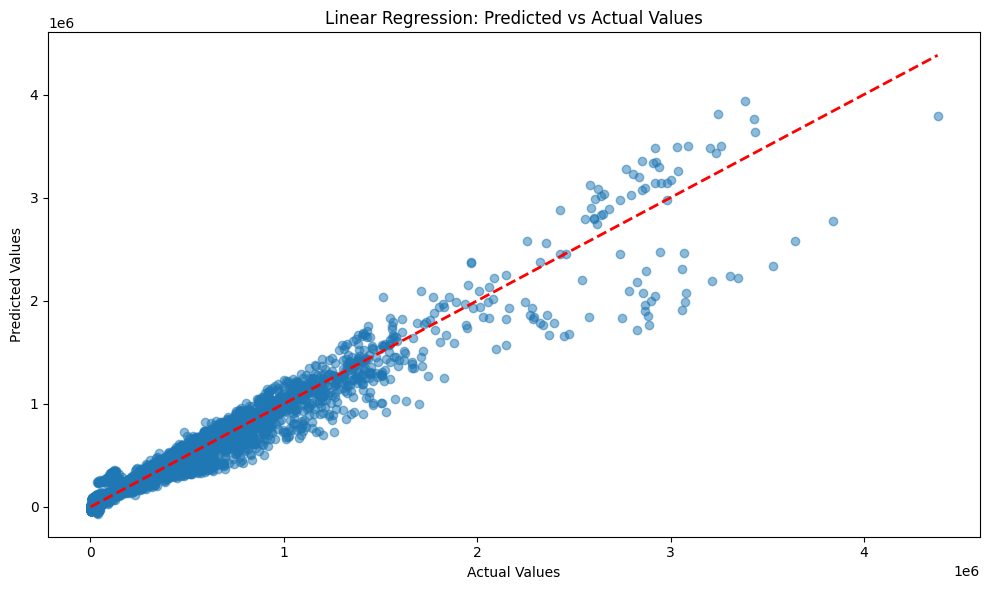

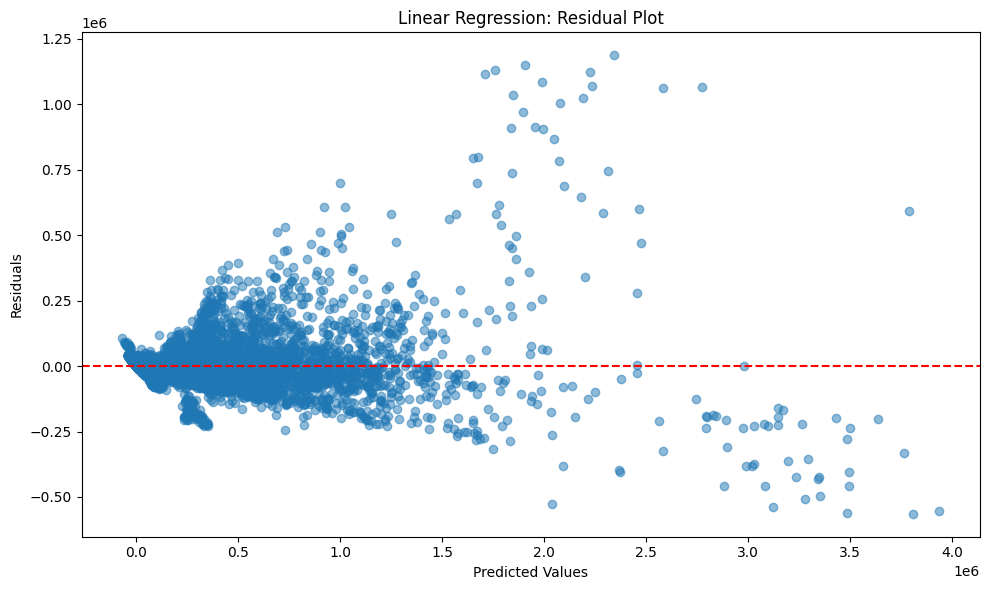


--------------------------------------------------
Cross-Validation Results (k=5):
--------------------------------------------------
R-squared: 0.9577 (+/- 0.0028)
RMSE:      89784.7258 (+/- 6198.8443)


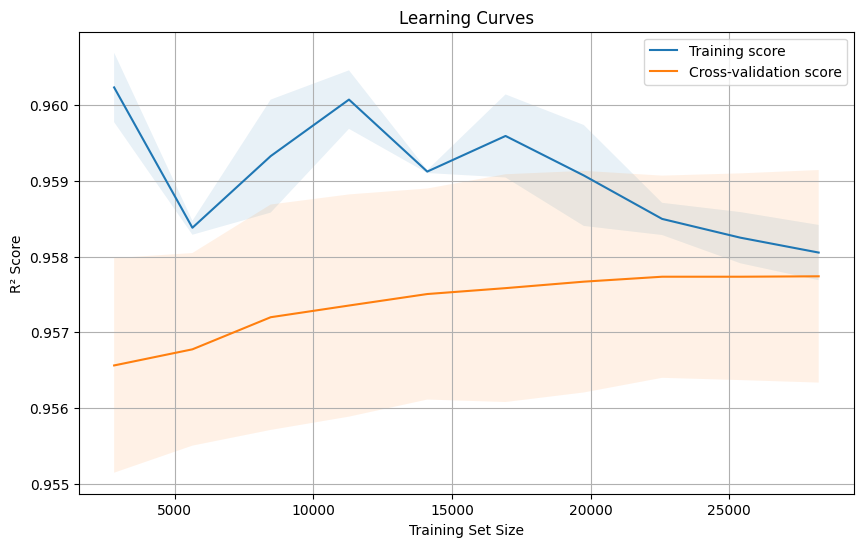


Checking data quality:
NaN values in features_train: 0
NaN values in target_train: 0
Target dtype: float64

--------------------------------------------------
Linear Regression Performance Metrics:
--------------------------------------------------
RMSE:      90985.8457
R-squared: 0.9547
MAE:       45763.0883


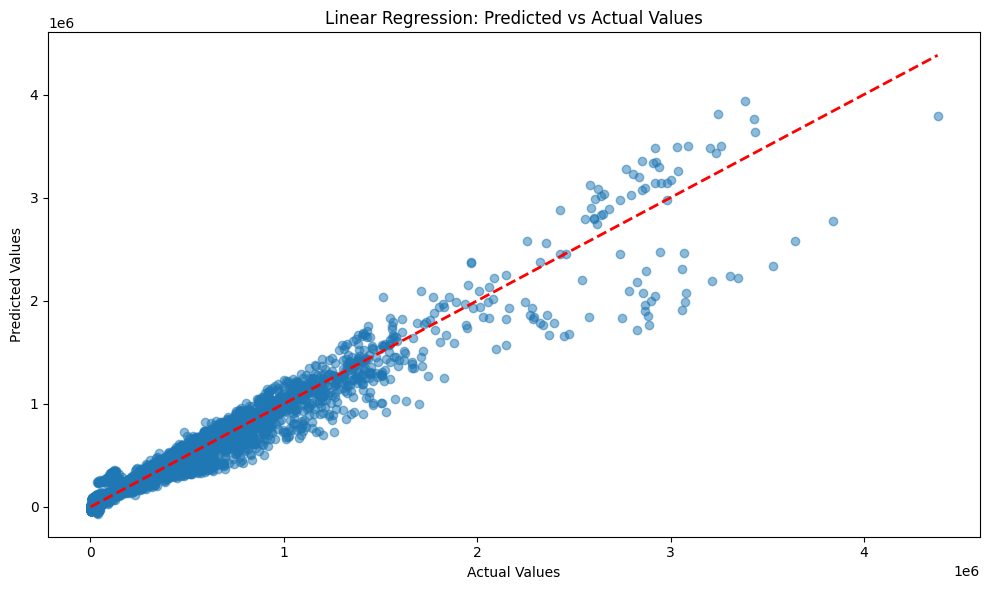

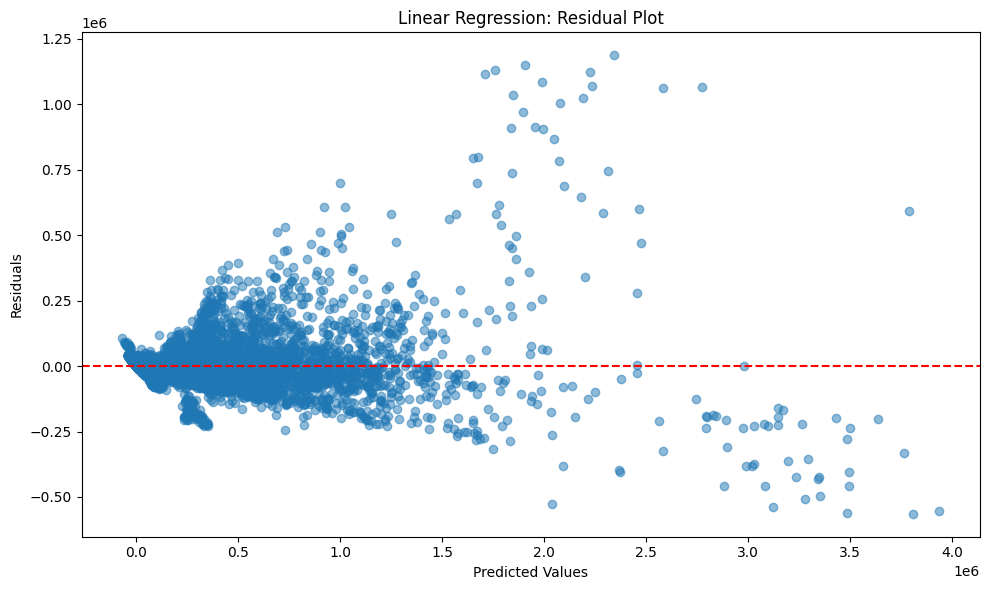


--------------------------------------------------
Random Forest Performance Metrics:
--------------------------------------------------
RMSE:      37131.2843
R-squared: 0.9925
MAE:       12346.6335


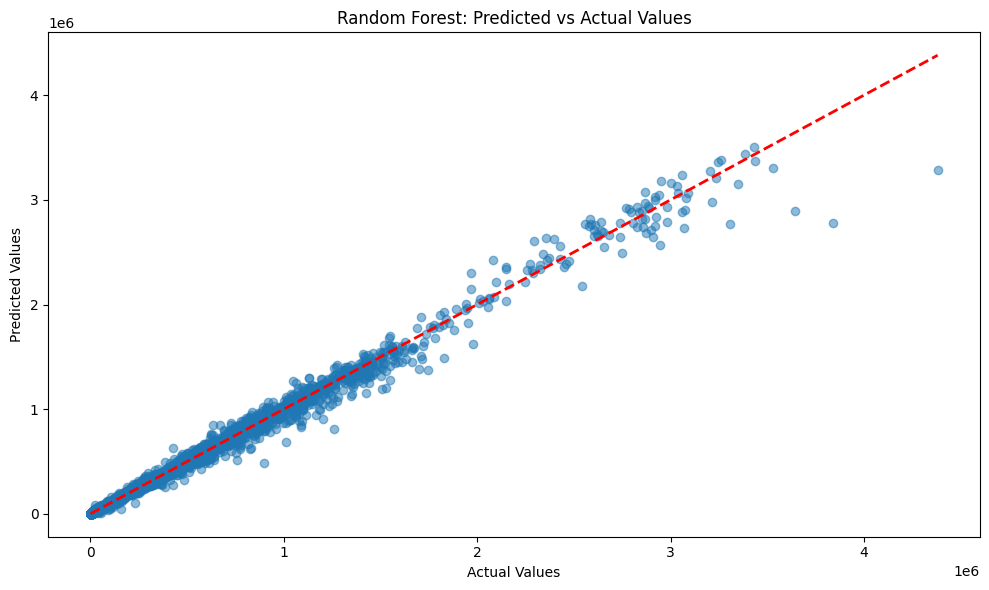

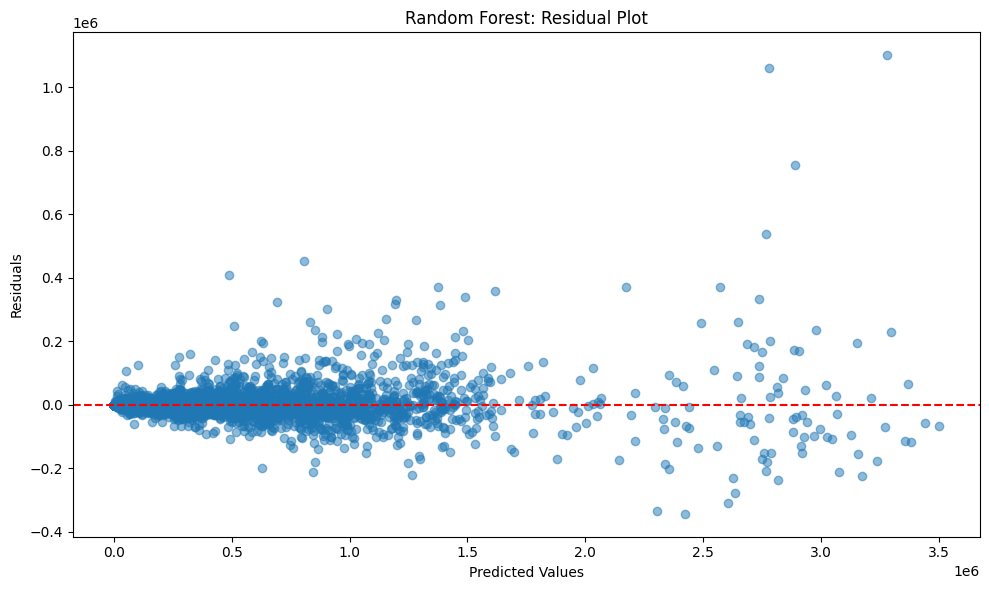


--------------------------------------------------
Gradient vr_modelBoosting Performance Metrics:
--------------------------------------------------
RMSE:      58357.7390
R-squared: 0.9814
MAE:       29454.2444


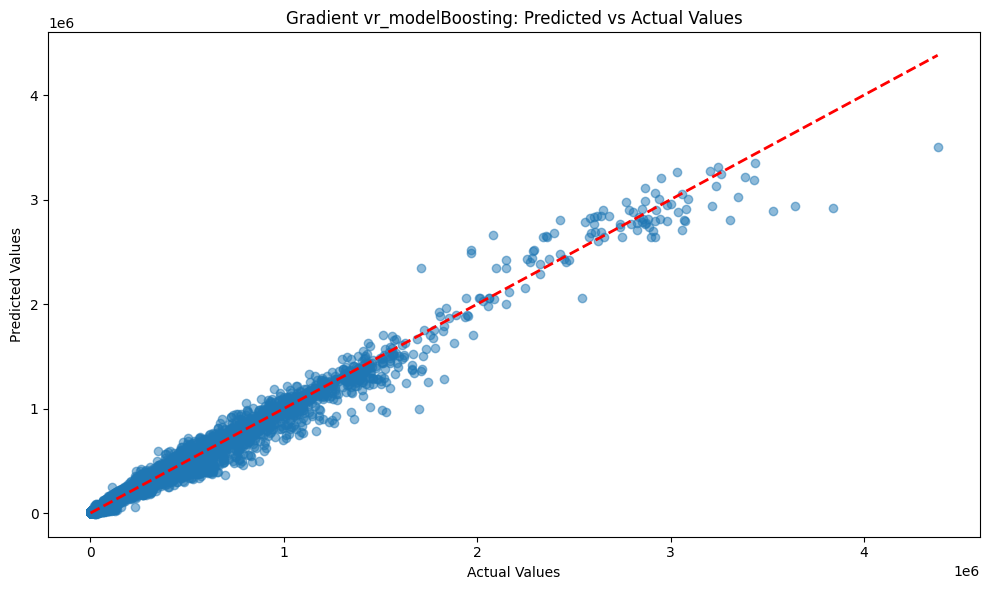

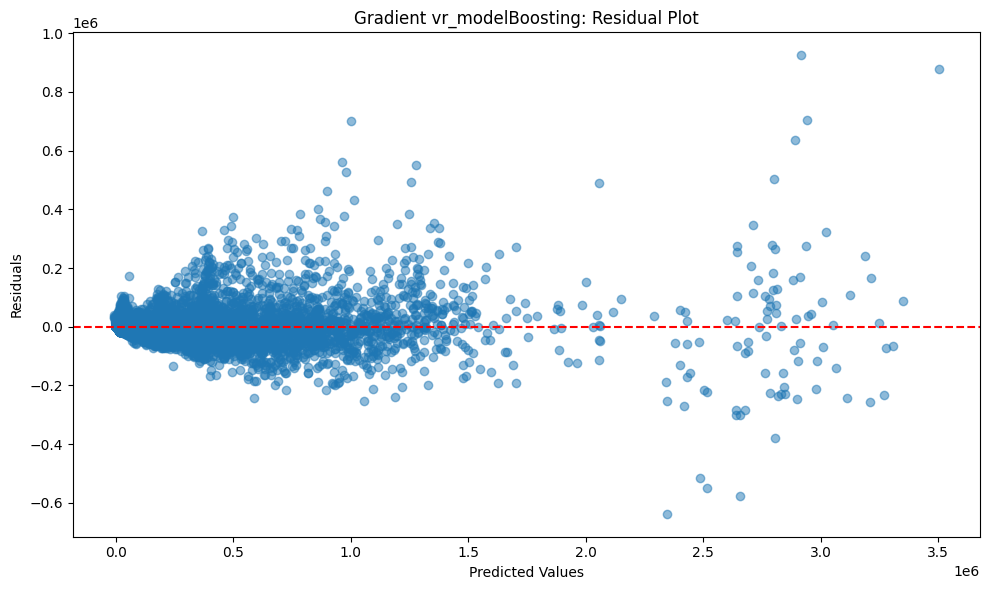

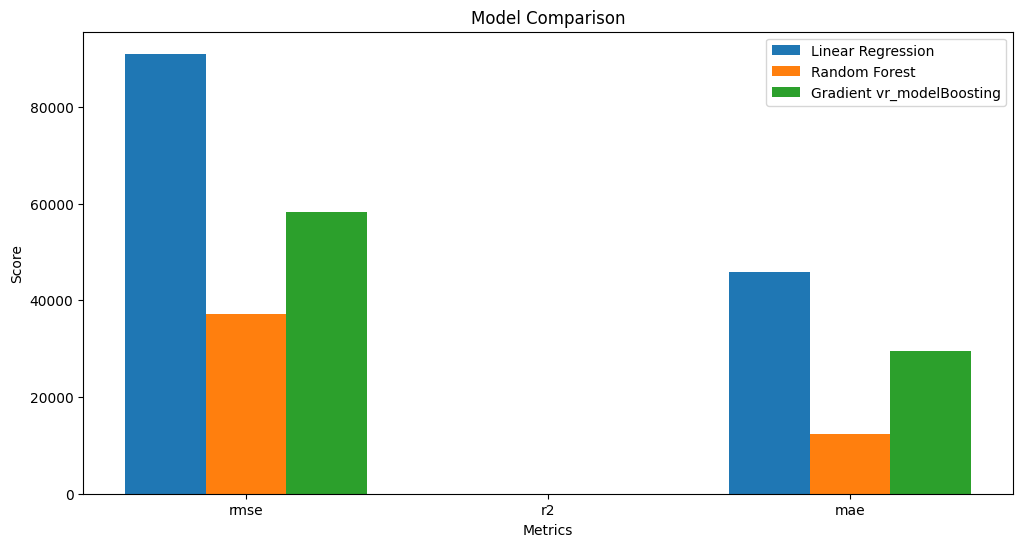

In [ ]:

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Now train the model with the correct variable names
linear_model = LinearRegression()
linear_model.fit(features_train, target_train)

# Make predictions
y_pred = linear_model.predict(features_test)

def evaluate_regression_model(target_test, y_pred, model_name="Model"):
    """
    Evaluation function specifically for regression models
    
    Parameters:
    target_test: True target values
    y_pred: Predicted target values
    model_name: Name of the model being evaluated
    """
    
    # Calculate regression metrics
    mse = mean_squared_error(target_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(target_test, y_pred)
    
    # Calculate mean absolute error
    mae = np.mean(np.abs(target_test - y_pred))
    
    # Print metrics
    print(f"\n{'-'*50}")
    print(f"{model_name} Performance Metrics:")
    print(f"{'-'*50}")
    print(f"RMSE:      {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"MAE:       {mae:.4f}")
    
    # Create scatter plot of predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(target_test, y_pred, alpha=0.5)
    plt.plot([target_test.min(), target_test.max()], 
             [target_test.min(), target_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Predicted vs Actual Values')
    plt.tight_layout()
    plt.show()
    
    # Create residual plot
    residuals = target_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}: Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()
    
    return {
        'rmse': rmse,
        'r2': r2,
        'mae': mae
    }

def compare_regression_models(models_dict, features_test, target_test):
    """
    Compare multiple regression models
    
    Parameters:
    models_dict: Dictionary of model names and their fitted model objects
    features_test: Test features
    target_test: True test values
    """
    
    results = {}
    
    # Evaluate each model
    for name, model in models_dict.items():
        y_pred = model.predict(features_test)
        results[name] = evaluate_regression_model(target_test, y_pred, name)
    
    # Create comparison visualizations
    metrics = ['rmse', 'r2', 'mae']
    
    # Plot comparison bar chart
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics))
    width = 0.8 / len(models_dict)
    
    for i, (name, metrics_dict) in enumerate(results.items()):
        values = [metrics_dict[metric] for metric in metrics]
        plt.bar(x + i * width, values, width, label=name)
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Model Comparison')
    plt.xticks(x + width * (len(models_dict) - 1) / 2, metrics)
    plt.legend()
    plt.show()

# Example usage:
# Make predictions
y_pred = linear_model.predict(features_test)

# Evaluate the model
metrics = evaluate_regression_model(target_test, y_pred, "Linear Regression")

# Cross-validation for regression


def perform_regression_cv(model, features_train, target_train, cv=5):
    """
    Perform k-fold cross-validation for regression models
    
    Parameters:
    model: The model to evaluate
    features_train: Training features
    target_train: Training target values
    cv: Number of folds for cross-validation
    """
    
    # Calculate cross-validation scores
    r2_scores = cross_val_score(model, features_train, target_train, cv=cv, scoring='r2')
    mse_scores = -cross_val_score(model, features_train, target_train, cv=cv, 
                                 scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    
    print(f"\n{'-'*50}")
    print(f"Cross-Validation Results (k={cv}):")
    print(f"{'-'*50}")
    print(f"R-squared: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
    print(f"RMSE:      {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")

# Perform cross-validation
perform_regression_cv(linear_model, features_train, target_train)

# Learning curves

def plot_regression_learning_curves(model, features_train, target_train):
    """
    Plot learning curves for regression models
    
    Parameters:
    model: The model to evaluate
    features_train: Training features
    target_train: Training target values
    """
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, features_train, target_train, cv=5, n_jobs=-1, 
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    # Calculate mean and std for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    # Calculate mean and std for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.plot(train_sizes, test_mean, label="Cross-validation score")
    
    # Plot bands representing standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.title("Learning Curves")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curves
plot_regression_learning_curves(linear_model, features_train, target_train)

# Before running the evaluation, check for any issues in the data:
print("\nChecking data quality:")
print("NaN values in features_train:", features_train.isnull().sum().sum())
print("NaN values in target_train:", target_train.isnull().sum())
print("Target dtype:", target_train.dtype)

# Example usage:
models = {
    'Linear Regression': linear_model,
    'Random Forest': rf_model,
    'Gradient vr_modelBoosting': gb_model,
    
 
}

# Compare multiple models
compare_regression_models(models, features_test, target_test)


##### Hyperparameter Tuning for Random Forest

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 1686603105.874234


In [37]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
